<a href="https://colab.research.google.com/github/Razor1889/Machine-Learning-on-Diverse-Datasets/blob/main/Term_Project_First_Case_Normal_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A Comparative Evaluation of Machine Learning Techniques on Diverse Dataset Types

In [ ]:
#Read in Data.
import pandas as pd
import IPython
import timeit

df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


In [ ]:
#Split the table such that we have y = F(x).
#Isolate the result.
y = df['logS']
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [ ]:
#By dropping the Species column, we have isolated the rest of the table.
x = df.drop('logS', axis=1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


Now that we have the data, we can then split the data into a 80-20 test train set, which is the first model training strategy. This strategy, along with others introduced in this project, are made possible by scikit and their model training utilities.

### 80-20 Train and Test Split

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
#We then create a training and testing split of 0.2 to the dataset (meaning we only train the 0.8 and test on the 0.2).
#The random state is selected to be 100. What is the random state? It is simply a seed value sent to a randomness generator.
#This generator shuffles the set before splitting it.
#By keeping the random state seed value at a constant (i.e 100) we ensure that if we reproduce this test,
#we will get the same result, making it easier to reproduce tests and maintain consistency.

In [ ]:
%%timeit -n 100
#Efficiency Analysis !!!ALWAYS RUN TIMEIT AS FIRST LINE IN CELL!!!
train_test_split(x, y, test_size=0.2, random_state=100)

820 µs ± 211 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
x_train
#Our train set has 80% of the 150 records.
#Note the shuffling of the data with seed 100, by looking at the record numbers in the leftmost column.

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [ ]:
x_test
#Our test set has the other 20%.

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


### Training the Model

In [ ]:
#DONT NEED TO DO THIS ON NORMAL DATA

#We then perform linear regression, however, since our y data has string values, we need to encode the values
#such that they have numerical assignments to each category of species.
#from sklearn.preprocessing import LabelEncoder

#label_encoder = LabelEncoder()

#y_train = label_encoder.fit_transform(y_train)
#y_test = label_encoder.fit_transform(y_test)

In [ ]:
from sklearn.linear_model import LinearRegression
#Create a linear regression model and provide the training data
lr = LinearRegression()
lr.fit(x_train, y_train)
#lr.fit trains the data

LinearRegression()

In [ ]:
%%timeit -n 100
#Testing Training Time
lr.fit(x_train, y_train)

1.4 ms ± 92 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
y_train
#Note that we have representations of 0,1,2 which represent the three possible classifications of species;
#virginica, versicolor, setosa

107   -4.440
378   -1.250
529   -1.655
546   -1.886
320   -0.740
       ...  
802   -2.925
53    -2.680
350   -7.020
79    -4.800
792   -3.240
Name: logS, Length: 915, dtype: float64

In [ ]:
#We then use the model (F) to predict the y values based on the x data.
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [ ]:
%%timeit -n 100
#Testing Predicting Time
lr.predict(x_train)

986 µs ± 333 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%%timeit -n 100
#Testing Predicting Time
lr.predict(x_test)

929 µs ± 213 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
#80% of the data (trained)
y_lr_train_pred

array([-2.83668969,  0.84208401, -0.50930302, -0.13058053, -1.6269208 ,
       -2.86103037, -2.32208333, -4.16684323, -5.04235077, -2.29737009,
       -3.15082845, -4.33037208, -1.43700682, -2.59060064, -7.09025955,
       -2.32734557, -4.19073421, -2.63904005, -3.58104074, -3.75929058,
       -2.5501665 , -3.26968347, -2.78911367, -2.69251051, -0.77437547,
       -6.61955792, -2.99084623, -2.36975061, -7.18167736, -1.52816491,
       -4.81736265, -0.86996608, -7.09025955, -1.87404275, -2.58013247,
       -4.80953284, -4.17454084, -1.95444152, -3.50503339, -2.7411418 ,
       -1.87131835, -2.45270806, -3.07252433, -1.48988982, -3.98778754,
       -1.35216679, -0.16932277, -6.05237002, -3.29550658,  0.30513174,
       -3.25501463, -5.31993586, -0.4733928 , -4.79180882, -5.82486323,
       -2.70343539, -3.70838271, -2.4987341 , -2.12301018, -3.11393974,
       -2.79842053, -1.38274662, -4.3267103 , -3.57778946, -3.42356884,
       -9.15826626, -6.52588866, -1.75832085, -4.97842312, -1.59

In [ ]:
#20% of the data (testing)
y_lr_test_pred

array([-3.05722870e+00, -7.77785827e+00, -2.55016650e+00, -2.01523582e+00,
       -2.06375990e+00, -9.99672215e-01, -5.94603364e-01, -5.53626003e-01,
       -5.72200956e+00, -3.94006681e+00, -3.95496755e+00, -2.29737009e+00,
       -1.48980354e+00, -1.48988982e+00, -4.64510806e+00, -1.90396018e+00,
       -1.51566313e+00, -3.16424605e+00, -3.70863920e+00, -5.58105660e+00,
       -3.25038467e+00, -5.04235077e+00, -5.69194881e+00, -2.14339849e+00,
       -4.35689341e+00, -5.03964756e+00, -3.10383618e+00, -4.40286964e+00,
       -4.21276272e+00,  5.56508349e-01, -1.45537678e+00, -4.41027396e+00,
       -2.59668773e+00, -1.53336276e+00, -5.55749874e-01, -1.67111795e+00,
       -2.78163675e+00, -3.15395565e+00, -5.27083361e+00, -1.75321446e+00,
       -1.53350725e+00, -2.01255666e+00, -6.57559167e+00, -7.89433046e+00,
       -5.76437127e+00, -4.16422068e+00, -3.43694663e+00,  1.43834212e+00,
       -1.12679105e-02, -2.34521849e+00, -1.86480046e+00, -5.03964756e+00,
        8.55886378e-01, -

So far, what we have done is implement F using linear regression. We then predicted y using F on the 2 data sets.

### Comparing Model Performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
#We will now test the model performance evaluating the mean squared error.
#and r2 score of the models.
#The r2 score measures how well the independent variables (x) explain the variability of the dependent variable (y).
#train set:
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

#test set:
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
print(' Train set MSE:',lr_train_mse, '\n',
'Train set r2:',lr_train_r2, '\n',
'Test set MSE:',lr_test_mse, '\n',
'Test set r2:',lr_test_r2)

 Train set MSE: 1.0075362951093687 
 Train set r2: 0.7645051774663391 
 Test set MSE: 1.0206953660861033 
 Test set r2: 0.7891616188563282


### Data Visualisation

Text(0.5, 0, 'Experimental Solubility')

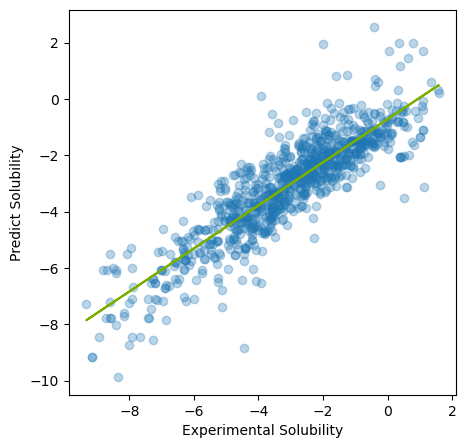

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred ,alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#7CAE00')
plt.ylabel('Predict Solubility')
plt.xlabel('Experimental Solubility')